In [1]:
#importing libraires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
#loading and displaying dataset
df1 = pd.read_csv(r'C:\Users\HP\Downloads\Used Cars Data-20240721T072109Z-001\Used Cars Data\pakwheels_used_cars.csv')
df1

,ad_ref,assembly,body,ad_city,color,engine_cc,fuel_type,make,mileage,model,registered,transmission,year,price
0,7927285,Imported,Van,Lahore,Pearl White,2000.0,Hybrid,Nissan,124000,Serena,Un-Registered,Automatic,1905.0,8990000.0
1,7679303,Imported,Hatchback,Lahore,Grey,996.0,Petrol,Toyota,30738,Vitz,Punjab,Automatic,1905.0,4190000.0
2,7915479,NaN,Sedan,Lahore,Super white,1798.0,Petrol,Toyota,183000,Corolla,Punjab,Automatic,1905.0,3990000.0
3,7918380,NaN,Sedan,Lahore,Crystal Black Pearl,1500.0,Petrol,Honda,41000,Civic,Punjab,Automatic,1905.0,6490000.0
4,7676167,Imported,MPV,Lahore,Silver,3000.0,Petrol,Toyota,126000,Alphard,Punjab,Automatic,1905.0,4750000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77232,7727137,Imported,Micro Van,Gujranwala,Black,660.0,Petrol,Suzuki,45000,Every,Un-Registered,Manual,1905.0,NaN
77233,7733253,NaN,Sedan,Karachi,Super White,1500.0,Petrol,Toyota,18000,Yaris,Karachi,Automatic,1905.0,4825000.0
77234,7719906,Imported,Micro Van,Gujranwala,Silver,660.0,Petrol,Suzuki,70000,Every,Un-Registered,Automatic,1905.0,NaN
77235,7627128,NaN,Sedan,Islamabad,Blue,1800.0,Petrol,Toyota,135600,Corolla,Islamabad,Automatic,1905.0,NaN


In [6]:
#displaying top 15 rows of dataset
df1.head(15)

,ad_ref,assembly,body,ad_city,color,engine_cc,fuel_type,make,mileage,model,registered,transmission,year,price
0,7927285,Imported,Van,Lahore,Pearl White,2000.0,Hybrid,Nissan,124000,Serena,Un-Registered,Automatic,1905.0,8990000.0
1,7679303,Imported,Hatchback,Lahore,Grey,996.0,Petrol,Toyota,30738,Vitz,Punjab,Automatic,1905.0,4190000.0
2,7915479,NaN,Sedan,Lahore,Super white,1798.0,Petrol,Toyota,183000,Corolla,Punjab,Automatic,1905.0,3990000.0
3,7918380,NaN,Sedan,Lahore,Crystal Black Pearl,1500.0,Petrol,Honda,41000,Civic,Punjab,Automatic,1905.0,6490000.0
4,7676167,Imported,MPV,Lahore,Silver,3000.0,Petrol,Toyota,126000,Alphard,Punjab,Automatic,1905.0,4750000.0
5,7908190,Imported,SUV,Lahore,White,2700.0,Petrol,Toyota,34000,Prado,Un-Registered,Automatic,1905.0,28900000.0
6,7823946,NaN,Sedan,Lahore,Modern Steel Metallic,1500.0,Petrol,Honda,65989,Civic,Punjab,Automatic,1905.0,6490000.0
7,7900746,Imported,Van,Lahore,Black,2000.0,Hybrid,Nissan,97000,Serena,Un-Registered,Automatic,1905.0,7700000.0
8,7917469,Imported,SUV,Lahore,White Pearl Crystal Shine,4600.0,Petrol,Toyota,9500,Land,Un-Registered,Automatic,1905.0,79800000.0
9,7815514,NaN,Sedan,Lahore,Crystal Black,1800.0,Petrol,Honda,147000,Civic,Punjab,Automatic,1905.0,4300000.0


In [7]:
#to preprocess dataset, i first checked how many nan values are there in the dataset
print("Initial NaN values per column:")
print(df1.isnull().sum())

Initial NaN values per column:
ad_ref              0
assembly        53261
body             8865
ad_city             0
color            1510
engine_cc           2
fuel_type         934
make                0
mileage             0
model               0
registered          0
transmission        0
year             4721
price             649
dtype: int64


In [8]:
#since there were a large number of nan values in the dataset, i decided to drop the data with missing values, instead of corrupting dataset by filling forward/backward
df1_new = df1.dropna()


In [9]:
#displaying dataset after dropping missing values
df1_new

,ad_ref,assembly,body,ad_city,color,engine_cc,fuel_type,make,mileage,model,registered,transmission,year,price
0,7927285,Imported,Van,Lahore,Pearl White,2000.0,Hybrid,Nissan,124000,Serena,Un-Registered,Automatic,1905.0,8990000.0
1,7679303,Imported,Hatchback,Lahore,Grey,996.0,Petrol,Toyota,30738,Vitz,Punjab,Automatic,1905.0,4190000.0
4,7676167,Imported,MPV,Lahore,Silver,3000.0,Petrol,Toyota,126000,Alphard,Punjab,Automatic,1905.0,4750000.0
5,7908190,Imported,SUV,Lahore,White,2700.0,Petrol,Toyota,34000,Prado,Un-Registered,Automatic,1905.0,28900000.0
7,7900746,Imported,Van,Lahore,Black,2000.0,Hybrid,Nissan,97000,Serena,Un-Registered,Automatic,1905.0,7700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77202,7499054,Imported,Hatchback,Islamabad,Unlisted,1000.0,Petrol,Toyota,118000,Passo,Islamabad,Automatic,1905.0,2095000.0
77205,7756215,Imported,Crossover,Islamabad,White,1500.0,Petrol,Honda,54000,Vezel,Un-Registered,Automatic,1905.0,7600000.0
77208,7757605,Imported,Hatchback,Sialkot,Silver,660.0,Petrol,Daihatsu,109902,Mira,Punjab,Automatic,1905.0,2150000.0
77211,7757642,Imported,Hatchback,Karachi,Grey,1000.0,Petrol,Suzuki,70000,Cultus,Karachi,Manual,1905.0,1170000.0


In [11]:
#chcking if all missing values have been removed
print("Checking if any NaN values exist per column:")
print(df1_new.isnull().sum())

Checking if any NaN values exist per column:
ad_ref          0
assembly        0
body            0
ad_city         0
color           0
engine_cc       0
fuel_type       0
make            0
mileage         0
model           0
registered      0
transmission    0
year            0
price           0
dtype: int64


In [13]:
#applying one hot encoding
categorical_columns = ['assembly', 'body', 'ad_city', 'color', 'fuel_type', 'make', 'model', 'registered', 'transmission']
df1_one_hot = pd.get_dummies(df1_new, columns=categorical_columns)
#displaying dataset after applying one hot encoding
df1_one_hot

,ad_ref,engine_cc,mileage,year,price,assembly_Imported,body_Compact SUV,body_Compact hatchback,body_Compact sedan,body_Convertible,...,registered_Sindh,registered_Sukkur,registered_Swat,registered_Toba Tek Singh,registered_Un-Registered,registered_Vehari,registered_Wah cantt,registered_Wazirabad,transmission_Automatic,transmission_Manual
0,7927285,2000.0,124000,1905.0,8990000.0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,7679303,996.0,30738,1905.0,4190000.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,7676167,3000.0,126000,1905.0,4750000.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,7908190,2700.0,34000,1905.0,28900000.0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
7,7900746,2000.0,97000,1905.0,7700000.0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77202,7499054,1000.0,118000,1905.0,2095000.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
77205,7756215,1500.0,54000,1905.0,7600000.0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
77208,7757605,660.0,109902,1905.0,2150000.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
77211,7757642,1000.0,70000,1905.0,1170000.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [14]:
#normalizing dataset
numerical_columns = df1_one_hot.select_dtypes(include=['int64', 'float64']).columns
df1_normalized = df1_one_hot.copy()

for col in numerical_columns:
    if df1_one_hot[col].max() != df1_one_hot[col].min(): 
        df1_normalized[col] = (df1_one_hot[col] - df1_one_hot[col].min()) / (df1_one_hot[col].max() - df1_one_hot[col].min())

In [16]:
#splitting my dataset into training and testing
X = df1_normalized.drop('price', axis=1) 
y = df1_normalized['price']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#appkying linear regression
#i chose to apply linear regression because it is straight forward
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)



In [22]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

#printing out results of linear regression 
print("Linear Regression Results:")
print("MSE:", mse_lr)
print("MAE:", mae_lr)
print("R2 Score:", r2_lr)

Linear Regression Results:
MSE: 5.034341970293334e+16
MAE: 15875489.99183925
R2 Score: -1.7021082169635897e+19


In [23]:
#applying random forest regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [24]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

#printing results of random forest
print("Random Forest Regression Results:")
print("MSE:", mse_rf)
print("MAE:", mae_rf)
print("R2 Score:", r2_rf)

Random Forest Regression Results:
MSE: 0.00034939603558719175
MAE: 0.006345193824085188
R2 Score: 0.8818693949166091


In [25]:

import matplotlib.pyplot as plt

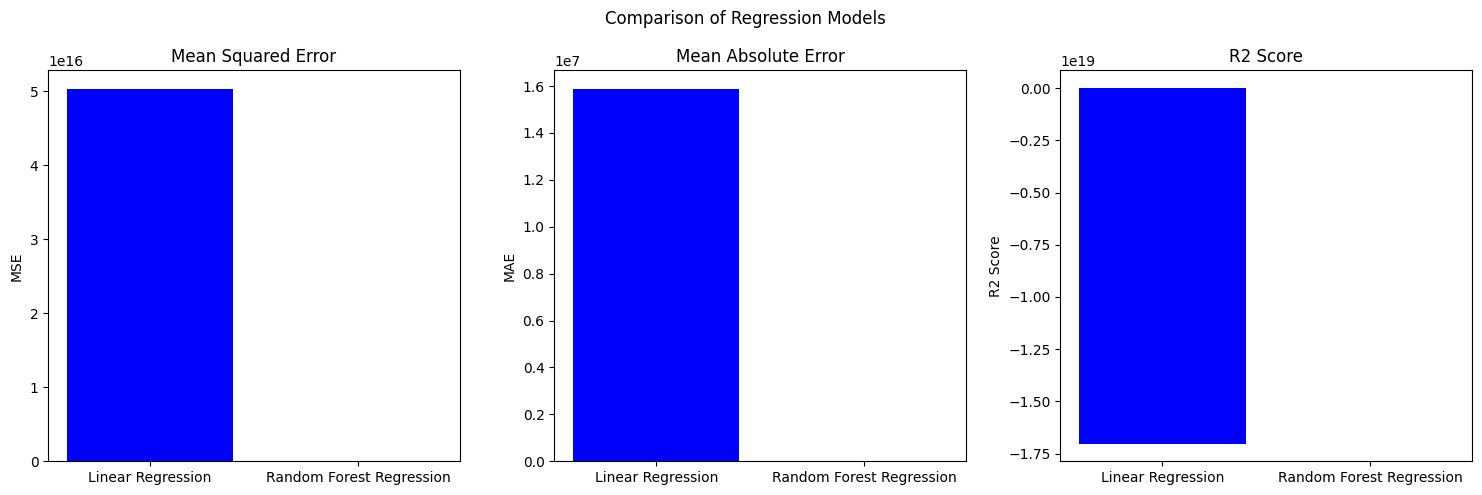

In [29]:
#creating subplots to evaluate
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regression'],
    'MSE': [mse_lr, mse_rf],
    'MAE': [mae_lr, mae_rf],
    'R2 Score': [r2_lr, r2_rf]
})

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# MSE
ax[0].bar(results['Model'], results['MSE'], color=['blue', 'orange'])
ax[0].set_title('Mean Squared Error')
ax[0].set_ylabel('MSE')

# MAE
ax[1].bar(results['Model'], results['MAE'], color=['blue', 'orange'])
ax[1].set_title('Mean Absolute Error')
ax[1].set_ylabel('MAE')

# R2 Score
ax[2].bar(results['Model'], results['R2 Score'], color=['blue', 'orange'])
ax[2].set_title('R2 Score')
ax[2].set_ylabel('R2 Score')

fig.suptitle('Comparison of Regression Models')
plt.tight_layout()
plt.show()